# Image Classifier
## 1. Setup
#### 1.1 Install dependencies

In [1]:
!pip install tensorflow opencv-python matplotlib

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/40/d9/c1784db9db0d484c8e5deeafbaac0d6ed66e165c6eb4a74fb43a5fa947d9/matplotlib-3.8.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.14.0


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip list

In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU memory consumption growth (In case GPU is used)
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimantal.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

#### 1.2 Remove unfit images

In [5]:
import cv2
import imghdr

C:\Users\danie\AppData\Local\Temp\ipykernel_9440\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_directory = 'data'
data_classes = os.listdir(data_directory)

In [7]:
os.listdir(os.path.join(data_directory, 'angry'))

['0257c8f90c9946a.jpg',
 '06Phoenix2-mediumSquareAt3X.jpg',
 '1000_F_262075572_hdSHjnMONS3pOCjmU9WIvZheG0aQDjxk.jpg',
 '118-1182652_angry-person-png-pic-angry-man-clipart.png',
 '159153032-angry-man-in-suit-white-background-full-body.jpg',
 '170915-anger-screaming-stock-njs-12p.jpg',
 '19_1016_DISCIPLESHIP_How-to-Deal-With-Angry-People_1021x640-696x436.jpg',
 '1w25F3sR1kwAJx6G6xnFUQA.jpeg',
 '2f1703b0-calm-an-angry-person-pexels-alex-green-5699491.jpg',
 '40-bigstock-Mad-fight-of-business-people-61801940.jpg',
 '49418-2-angry-person-free-transparent-image-hq.png',
 '5cd88fd321000035007f6cd2.jpeg',
 '60552212-angry-people-illustration-design-collection.jpg',
 '610wSoPlkL._AC_UF10001000_QL80_.jpg',
 '67456.jpg',
 '7-ways-anger-is-ruining-your-health-722x406.jpg',
 '71KDmK8aMKL._AC_UF10001000_QL80_.jpg',
 '758970f3-4e06-4960-9443-2633a118e005-gettyimages-713875731.jpg',
 'ad_220696309.jpg',
 'anger-intelligence-neurosciencenews-public.jpg',
 'anger-management.jpg',
 'Anger2.jpg',
 'anger_

In [8]:
image_extensions = ['jpeg', 'jpg', 'bmp', 'png']

In [9]:
for image_class in data_classes:
    for image in os.listdir(os.path.join(data_directory, image_class)):
        image_path = os.path.join(data_directory, image_class, image)
        try:
            img = cv2.imread(image_path) # Checking whether the image can be loaded into opencv
            tip = imghdr.what(image_path) # Getting the image type to filter it afterwards
            if tip not in image_extensions:
                print('Image not in extensions list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

#### 1.3 Load Data

In [10]:
# Tensorflow API
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [11]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [12]:
from matplotlib import pyplot as plt
import numpy as np

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data') # Helper used to load data

Found 174 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator() # Converting to iterate the data more easily

In [15]:
# Get another batch from the iterator
batch = data_iterator.next()

- Images get automatically resized to `256x256`.
- Also sets a batch size (Changeable).

In [16]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [17]:
# Labels
# CLASS 0: Angry
# CLASS 1: Calm
batch[1]

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0])

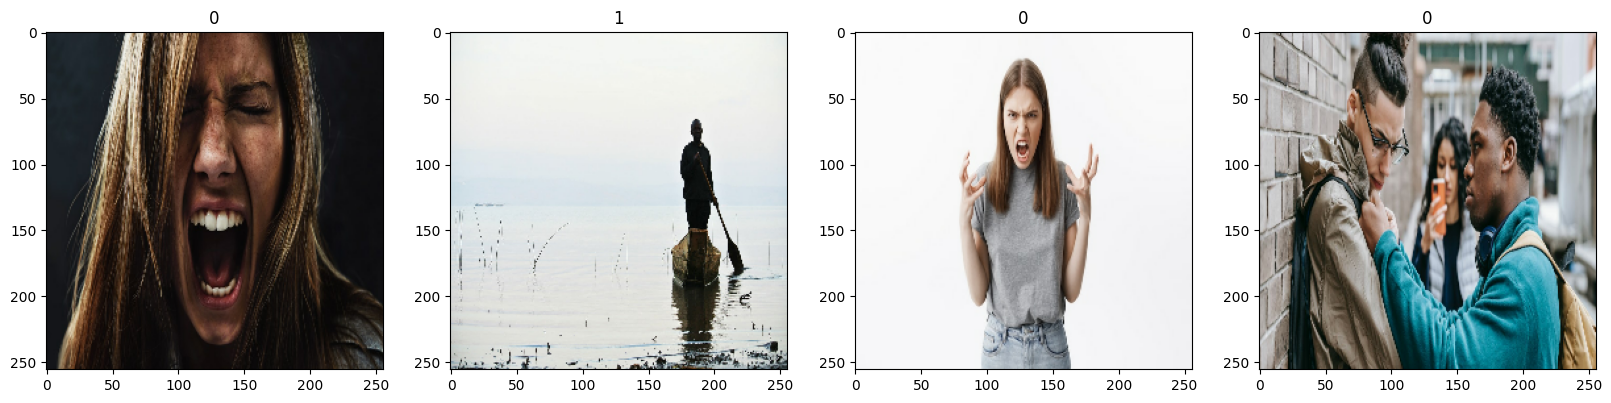

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20)) # Used to plot out 4 images
for index, img in enumerate(batch[0][:4]):
    ax[index].imshow(img.astype(int))
    ax[index].title.set_text(batch[1][index])

## 2. Preprocess Data
#### 2.1 Scale Data

In [19]:
data = data.map(lambda x, y: (x/255, y)) # Execute a function across the dataset to scale it

In [20]:
data.as_numpy_iterator().next()[0].max() # The max will be 1 and the min 0

1.0

#### 2.2 Split Data

In [21]:
len(data) # Number of batches

6

In [22]:
training_size = int(len(data)*.7)
validation_size = int(len(data)*.2)
testing_size = int(len(data)*.1)+1

In [23]:
testing_size + training_size + validation_size

6

In [24]:
# Data needs to be shuffled before this (already done in this case)
train = data.take(training_size)
validation = data.skip(training_size).take(validation_size)
testing = data.skip(training_size+validation_size).take(testing_size)

## 3. Deep Model
#### 3.1 Build the Deep Learning Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()
# model = Sequantial([Conv2D, ...])

In [27]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3))) # 16 filters of 3x3 size stepping every 1 pixel, relu - rectified linear unit
model.add(MaxPooling2D()) # Condenses the information (width and height) by taking the max value after the relu activation (goes over a 2x2 region and takes the max)

model.add(Conv2D(32, (3, 3), 1, activation='relu')) # The input shape is only needed to be specofied in the first input
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten()) # transforms the feature maps into a 1D vector. 

model.add(Dense(256, activation='relu')) # First Dense layer with 256 neurons (Dense beacause they are fully conencted)
model.add(Dense(1, activation='sigmoid')) # sigmoid converts every value to a value between 0-1 (angry or calm)

In [28]:
model.compile('adam', loss=tf.losses.BinaryFocalCrossentropy(), metrics=['accuracy']) # adam is the optimizer, then the loss function and the metric of evaluation during training

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

The convolutional layers will scale down data, this can be prevented by adding **padding**.

#### 3.2 Train

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
history = model.fit(train, epochs=20, validation_data=validation, callbacks=[tensorboard_callback]) # epochs is how long training lasts, how many runs the model will go through the data

#### 3.3 Plot Performance

In [ ]:
history.history

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In the case where the val_loss starts to go up and the loss keeps going down could indicate that the model is overfitting (has a variance problem): in this case the best approach would be regularization, applying some data or change some data.

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## 4. Evaluate Performance
#### 4.1 Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [ ]:
for batch in testing.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

In [ ]:
print(f'Precision: {precision.result().numpy()}, Recall: {recall.result().numpy()}, Accuracy: {accuracy.result().numpy()}')

#### 4.2 Test

In [ ]:
img = cv2.imread('calmtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # display might be weird beacuse opencv reads it in bgr
plt.show()

In [ ]:
resized_image = tf.image.resize(img, (256, 256))
plt.imshow(resized_image.numpy().astype(int))
plt.show()

In [ ]:
# encapsulating the image into another dimension (list) because the CNN expects a batch of images
# The 0 stnads for the axis where the extra dimension will be added
yhat = model.predict(np.expand_dims(resized_image/255, 0))

In [ ]:
yhat

In [ ]:
def happy_or_sad(yhat):
    if yhat > 0.5:
        print("Predicted class is Calm")
    else:
        print("Predicted class is Angry")

In [ ]:
happy_or_sad(yhat)

In [ ]:
img = cv2.imread('angrytest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
resized_image = tf.image.resize(img, (256, 256))
plt.imshow(resized_image.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resized_image/255, 0))
print(yhat)
happy_or_sad(yhat)

## 5. Save the Model
#### Save

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models', 'calmangrymodel.h5')) # save the model in models folder

In [ ]:
new_model = load_model(os.path.join('models', 'calmangrymodel.h5'))

In [ ]:
yhat_new = new_model.predict(np.expand_dims(resized_image/255, 0))
happy_or_sad(yhat_new)